
# 주제 : 여러 의상 사진에서 옷 종류 구분하기
--------------
## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## 데이터 소개
  - 이번 주제의 데이터는 너무나 유명한 fashion MNIST 데이터를 사용합니다.
  ![mnist 이미지](https://rviews.rstudio.com/post/2019-10-31-a-comparison-of-methods-for-predicting-clothing-classes-using-the-fashion-mnist-dataset-in-rstudio-and-python-part-1/index_files/figure-html/unnamed-chunk-8-1.png)

   위의 이미지는 다음과 같은 것을 보여줍니다.  
(a) 28x28의 배열에서 의류의 모습 어떻게 모사되는지   
(b) 각 0-9까지의 다양한 의류 그림의 모습들


   - 데이터 출처: [fashionmnist](https://www.kaggle.com/zalando-research/fashionmnist)

## 최종 목표

  - fashion MNIST 이미지를 클래시피케이션 하기
  - 멀티 클래스와 멀티레이블 구분하기
  - 이미지 확장 하기
  - 이미지에 객체 삽입하기

  - 출제자 : 손근영 강사


In [164]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## Step 1. 도입전 기본 처리

### 문제 1. fashion mnist 데이터 살펴보기

- 데이터를 불러오는 코드를 작성해주세요.

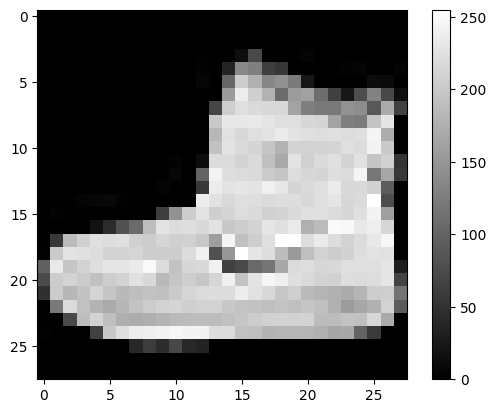

9


In [165]:
# 데이터를 불러오는 코드를 작성해주세요.
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = data

plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()
print(train_labels[0])







### 문제 2. train_images/labels와 test_images/labes의 shape을 출력해보세요.

- 데이터의 크기를 shape 함수를 통해 출력해주세요.


In [166]:

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 레이블을 설정해보세요.

In [167]:
labels = ["T-shirt/top",  # index 0
        "Trouser",        # index 1
        "Pullover",       # index 2 
        "Dress",          # index 3 
        "Coat",           # index 4
        "Sandal",         # index 5
        "Shirt",          # index 6 
        "Sneaker",        # index 7 
        "Bag",            # index 8 
        "Ankle boot"]     # index 9

def idx2label(idx):
        return labels[idx]

In [168]:
print(idx2label(train_labels[0]))

Ankle boot


### 문제 3. (28, 28) 형태의 이미지를 plt을 이용하여 출력해보세요.

- 28x28의 흑백 이미지를 plt를 이용하여 출력하는 코드를 작성해보세요


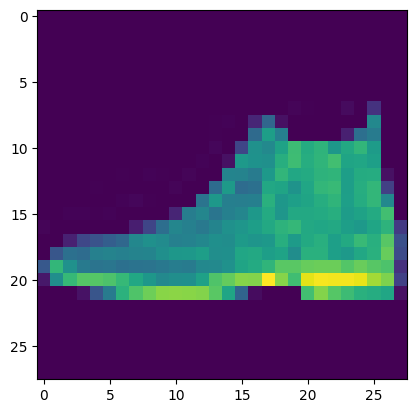

Ankle boot


In [169]:
plt.imshow(test_images[0])
plt.show()
print(idx2label(test_labels[0]))

- plt의 title에 label 정보를 출력해보세요.

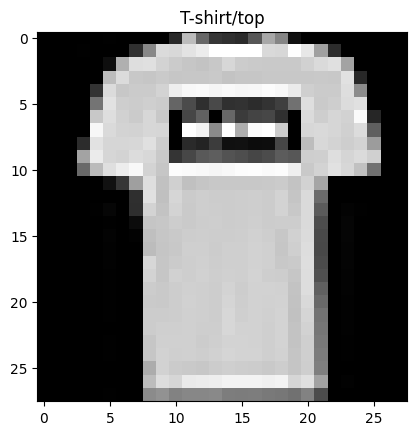

In [170]:
def show(idx):
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(idx2label(train_labels[idx]))
    plt.show()
    
show(1)
    

### 문제 4. train_images에서 0이 아닌 값들을 출력해보세요.

- 하나의 이미지에 대한 모든 0이 아닌 값을 출력하는 코드를 작성하세요.

In [171]:
print(train_images[train_images !=0][:10])

[  1  13  73   1   4   1   1   3  36 136]


- 이미지의 값이 가장 큰 idx와 작은 idx를 구하여 출력해보세요

In [172]:
print(train_images.reshape((60000, -1)).sum(axis = 1).argmax())
print(train_images.reshape((60000, -1)).sum(axis = 1).argmin())



55023
9230


In [173]:
print(train_images.reshape((60000, -1)).sum(axis = 1)[55023])
print(train_images.reshape((60000, -1)).sum(axis = 1)[9230])

150387
3876


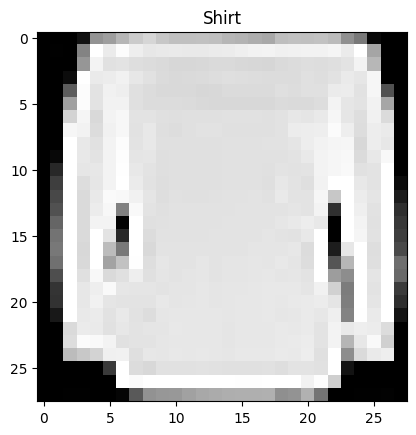

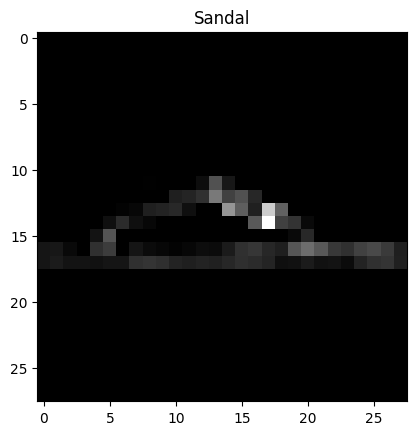

In [174]:
show(55023)
show(9230)

### 문제 5. train_images의 dtype을 출력해보세요.

- dtype을 이용하여 이미지의 np array type을 확인해보세요.

In [175]:
print(train_images.dtype)

uint8


## Step 2. 전처리

### 문제 6. train/test 이미지 데이터의 범위 확인

- test_images의 shape과 dtype, 0이 아닌 숫자를 출력하는 코드를 작성하세요.

In [176]:
print(test_images.shape, test_images.dtype, test_images[test_images != 0][:5])

(10000, 28, 28) uint8 [ 3  1  7 37  1]


### 문제 7. train/test 이미지 데이터의 최소/최대값을 출력

- train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.

In [177]:
print(train_images.max(), train_images.min())
print(train_labels.max(), train_labels.min())

print(test_images.max(), test_images.min())
print(test_labels.max(), test_labels.min())

255 0
9 0
255 0
9 0


### 문제 8. 정수형을 실수형으로 변경 후 dtype으로 비교

- train/test 데이터의 타입을 dtype으로 확인해보고 실수형으로 전환하는 코드를 작성하세요.

In [178]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

print(train_images.dtype)
print(test_images.dtype)
print(test_images.min(), test_images.max())
print(train_images.min(), train_images.max())

float64
float64
0.0 255.0
0.0 255.0


### 문제 9. 데이터 0-1 노말라이즈 수행


#### 힌트

일반적으로 0-1사의의 값을 가지게 하기 위해서는 다음 수식을 사용합니다.

$$normalize(x) = \frac{x - 최소값}{최대값 - 최소값}$$

이 경우 최소값이 0이기 떄문에 다음과 같이 간편하게 구할 수 있습니다.

$$normalize(x) = \frac{x}{최대값}$$

- images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.

In [179]:
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())


0.0 1.0
0.0 1.0


- 임의의 구간으로 노말라이즈 할 수 있는 코드를 작성해보세요

In [180]:
def norm(data):
    min_v = data.min()
    max_v = data.max()
    
    return (data - min_v) / (max_v - min_v)

### 문제 10. 0-1 노말라이즈 후 데이터의 값이 변경되었는지 문제 6, 7의 방법을 이용하여 확인하세요.

- 노말라이즈 후 min/max, shape, 0이 아닌 값, dtype 등을 확인하는 코드를 작성해보세요. 

In [181]:
print(train_images.max(), train_images.min(), train_images[train_images != 0][:10], train_images.shape, train_images.dtype)
print(test_images.max(), test_images.min(), test_images[test_images != 0][:10], test_images.shape, test_images.dtype)

1.0 0.0 [0.00392157 0.05098039 0.28627451 0.00392157 0.01568627 0.00392157
 0.00392157 0.01176471 0.14117647 0.53333333] (60000, 28, 28) float64
1.0 0.0 [0.01176471 0.00392157 0.02745098 0.14509804 0.00392157 0.00784314
 0.10588235 0.32941176 0.04313725 0.46666667] (10000, 28, 28) float64


- 스케일링 범위를 바꿔서 시도해보세요 (0 ~ 3), (0 ~ 4)

In [182]:
a = norm(train_images) * 3
print(a.min(), a.max())

a = norm(train_images) * 4
print(a.min(), a.max())



0.0 3.0
0.0 4.0


## Step 3. 시각화 방법

### 문제 11. train_image의 이미지를 5장 획득하여 (5, 28, 28)의 shape을 출력하세요.

- (60000, 28, 28)인 train_images에서 (5, 28, 28)을 획득하는 코드를 작성하세요.

In [183]:
print(train_images[:5].shape)

(5, 28, 28)


### 문제 12. 획득한 5장의 의미지를 (28, 28 * 5)의 shape으로 변경해보세요.

- np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.

- 해당 기능을 쓰면 (height, image_height, image_width)의 shape을 (image_height, image_width * height)으로 바꿔 줄 수 있습니다.

- 코드를 작성해보세요.

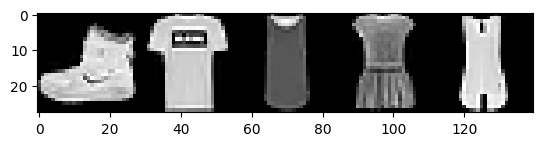

In [184]:
np.hstack(train_images[:5])
plt.imshow(np.hstack(train_images[:5]), cmap='gray')

plt.show()

### 문제 13. np.hstack은 tensorflow에서 제공하는 방법이 아니므로 transpose 함수를 이용하여 (28, 28 * 5)로 shape을 변경해보세요.

- transpose는 tensor의 axis를 섞는 기능을 합니다.

- 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.

In [185]:
train_images[:5].shape

train_images[:5].transpose(1, 0, 2).reshape(28, -1).shape

(28, 140)

### 문제 14. (28, 140)이 된 tensor를 plt로 출력해보세요.

- (28, 140)의 이미지를 plt로 출력해보세요.

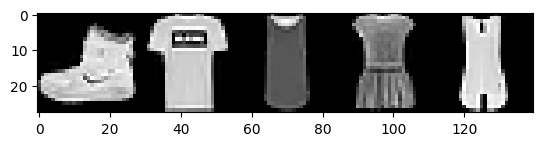

In [186]:
plt.imshow(train_images[:5].transpose(1, 0, 2).reshape(28, -1), cmap='gray')
plt.show()

- 레이블에 따라 5개를 출력하는 함수를 만들어보세요.

In [187]:
# 9번 라벨을 가지고 있는 인덱스들을 알려줌
np.argwhere(train_labels == 9)[:5, ..., 0]

# np.argwhere(train_labels == 9)는 NumPy 배열 train_labels에서 값이 9인 모든 원소의 인덱스를 찾는 것입니다. 
# 이 명령은 조건을 만족하는 모든 원소의 인덱스를 2D 배열로 반환합니다.

# [:5, ..., 0]는 이렇게 반환된 2D 배열에서 특정 부분을 선택하는 것을 나타냅니다. 

# [:5]: 이 부분은 첫 번째 축 (행)에서 인덱스 0부터 4까지의 범위를 선택합니다. 즉, 첫 번째 5개의 행을 선택합니다.

# ..., 0: 이 부분은 두 번째 축 (열)에서 인덱스 0을 선택합니다. 

# 여기서 ...은 생략 기호로, 나머지 모든 축을 의미합니다. 2D 배열이기 때문에 두 번째 축은 열을 나타내며, 0은 첫 번째 열을 나타냅니다.
# 따라서 np.argwhere(train_labels == 9)[:5, ..., 0]는 train_labels 배열에서 값이 9인 원소들의 인덱스를 찾고, 이 중에서 첫 번째 5개의 행(인덱스 0부터 4)만 선택하여 그 중 첫 번째 열(인덱스 0)의 값을 반환합니다. 이 결과는 값이 9인 원소들 중에서 첫 번째 5개 원소의 행 인덱스를 나타내며, 각 행의 첫 번째 열의 값을 반환합니다.


array([ 0, 11, 15, 42, 44])

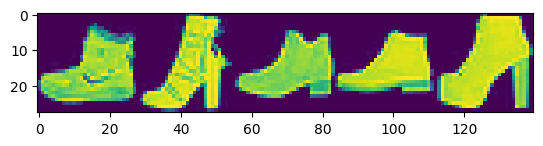

In [188]:
plt.imshow(train_images[np.argwhere(train_labels == 9)[:5, ..., 0]].transpose(1, 0, 2).reshape(28, -1)) 


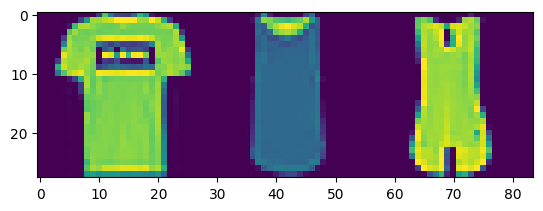

In [189]:
def filter(label, count=5):
    images = train_images[np.argwhere(train_labels == label)[:count, ..., 0]].transpose(1, 0, 2).reshape(28, -1)
    plt.imshow(images)
    plt.show()

filter(0, 3)

## Step 4. Data augmentation - 이미지 확대 및 다객체 추가 방법

### 문제 15. 이미지 한장의 크기를 4배로 확대하고, 객체는 4분면 영역중 랜덤으로 1공간에 넣는 함수를 작성하여보세요.

- 이미지 한장의 크기를 4배로 확대하고, 객체는 4분면 영역중 랜덤으로 1공간에 넣는 함수를 작성하여보세요.

In [190]:
def expade_4times(img):
    bg = np.zeros(img.shape)    
    # print(bg.shape)
    idx = np.random.randint(0, 4)
    
    slots = [bg, bg, bg, bg]
    slots[idx] = img

    expanded = np.vstack([
        np.hstack(slots[:2]),
        np.hstack(slots[2:])
    ])
    
    return expanded

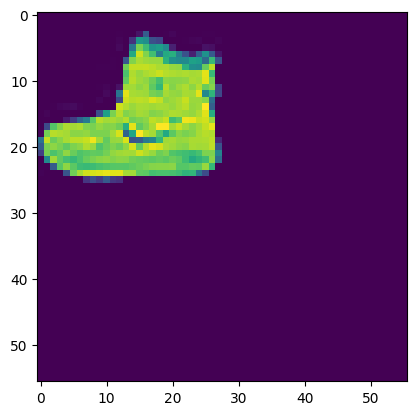

In [191]:
plt.imshow(expade_4times(train_images[0]))
plt.show()

### 문제 16. 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_expand_images, test_expand_images를 생성하세요.

- 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_expend_images, test_expend_images를 생성하세요.

In [192]:

train_expand_images = np.array([expade_4times(img) for img in train_images])
test_expand_images = np.array([expade_4times(img) for img in test_images])

In [193]:
print(train_expand_images.shape, train_expand_images.dtype)
print(train_expand_images.min(), train_expand_images.max())

print(test_expand_images.shape, test_expand_images.dtype)
print(train_expand_images.min(), train_expand_images.max())


(60000, 56, 56) float64
0.0 1.0
(10000, 56, 56) float64
0.0 1.0


### 문제 17. 4배 이미지 변환 함수를 수정하여 이미지 사이즈를 4배 확대 시킨 뒤, 객체를 랜덤으로 0~4개, 랜덤 4분면에 위치시키는 함수를 작성하세요.

- 4배 이미지 변환 함수를 수정하여 이미지 사이즈를 4배 확대 시킨 뒤, 객체를 랜덤으로 1~4개, 랜덤 4분면에 위치시키는 함수를 작성하세요.

In [194]:
def expanded_4times2(x_data, y_data):
    images = []
    labels = []
    
    for _ in range(4):
        bg = np.zeros((28, 28))
        # print(bg.shape)
        obj_count = np.random.randint(0, 5)
        
        label = np.zeros((10, ))
        
        slots = [bg, bg, bg, bg]
        
        for idx in range(obj_count):
            i = np.random.randint(len(x_data))
            
            slots[idx] = x_data[i]
            label += tf.keras.utils.to_categorical(y_data[i], 10)
        
        np.random.shuffle(slots)        
    
    new_img = np.vstack([
        np.hstack(slots[:2]),
        np.hstack(slots[2:])
    ])
    
    images.append(new_img)
    labels.append((label >= 1).astype(np.int8))
    
    return np.array(images), np.array(labels)
    

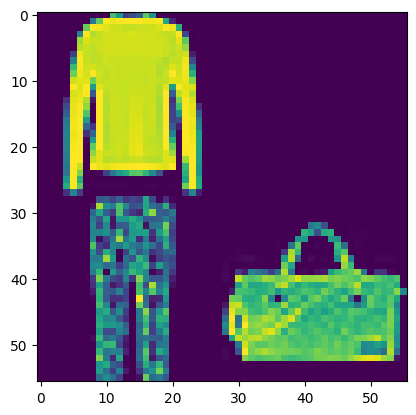

In [195]:
plt.imshow(expanded_4times2(train_images, train_labels)[0][0])

### 문제 18. 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_multi_images, test_multi_images, train_multi_labels, train_multi_labels를 생성하세요.

- 4배 이미지 변환을 전체 train/test 데이터에 실행하여 train_multi_images, test_multi_images, train_multi_labels, train_multi_labels를 생성하세요.

In [196]:
train_multi_images, train_multi_labels = list(zip(*[expanded_4times2(train_images, train_labels) for i in train_images]))
test_multi_images, test_multi_labels = list(zip(*[expanded_4times2(test_images, test_labels) for i in test_images]))

In [197]:
print(np.array(train_multi_images).shape)# [:, 0, :, :].shape
print(np.array(train_multi_images)[:, 0, :, :].shape)

# np.array(train_multi_images)[:, 0, :, :].reshape(-1, 56, 56, 1)
print(np.array(train_multi_labels).shape)
print(np.array(train_multi_labels)[:, 0 ,:].shape)


(60000, 1, 56, 56)
(60000, 56, 56)
(60000, 1, 10)
(60000, 10)


In [198]:
train_multi_images = np.array(train_multi_images)[:, 0, :, :].reshape(-1, 56, 56, 1)
train_multi_labels = np.array(train_multi_labels)[:, 0, :]

test_multi_images = np.array(test_multi_images)[:, 0, :, :].reshape(-1, 56, 56, 1)
test_multi_labels = np.array(test_multi_labels)[:, 0, :]

In [199]:
print(train_multi_images.shape, train_multi_labels.shape)

(60000, 56, 56, 1) (60000, 10)


- 개수에 따라 연속된 그림을 보여주는 함수를 작성해보세요

In [200]:
def filter2(obj_count, count = 5):
    labels = train_multi_labels.sum(axis = 1)

    idx = np.argwhere(labels == obj_count)[:count, 0]
    
    imgs = train_multi_images[idx][..., 0].transpose(1, 0, 2).reshape(56, -1)
    plt.imshow(imgs)
    plt.show()



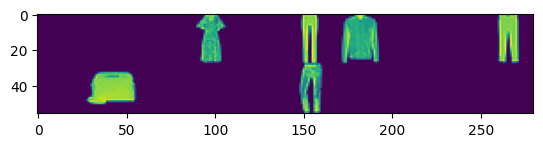

In [201]:
filter2(1, 5)

### 문제 19. multi labels와 train_labels의 값의 형태를 비교해보세요.

-  multi labels와 train_labels의 값의 형태를 비교해보세요.

In [202]:
train_multi_labels[0]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int8)

### 문제 20. train_labels에서 label들의 분포를 구해보세요.

- 문제 20. train_labels에서 label들의 분포를 히스토그램으로 구해보세요.

<BarContainer object of 10 artists>

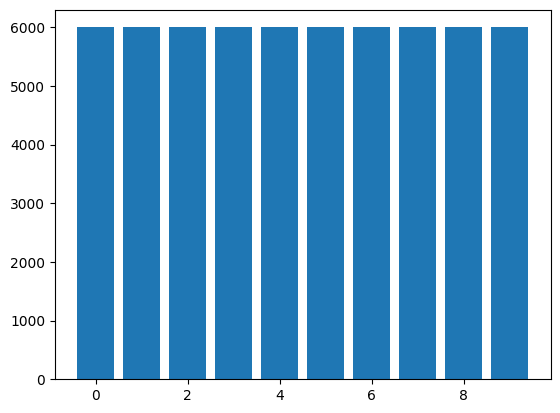

In [203]:
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], tf.keras.utils.to_categorical(train_labels).sum(axis=0))

### 문제 21. multi labels에서 label들의 분포와  multi images에서 평균 사진 개수 분포를 구하세요.

- multi labels에서 label들의 분포를 히스토그램으로 구해보세요.

<BarContainer object of 10 artists>

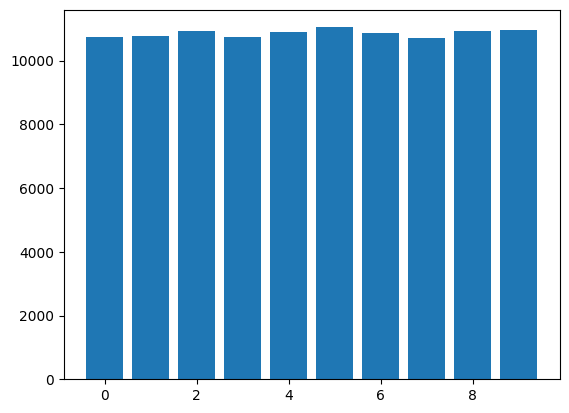

In [204]:
plt.bar([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], train_multi_labels.sum(axis=0))

-  multi images에서 평균 사진 개수 분포를 구하세요

(array([11955.,     0., 13314.,     0.,     0., 14825.,     0., 13949.,
            0.,  5957.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

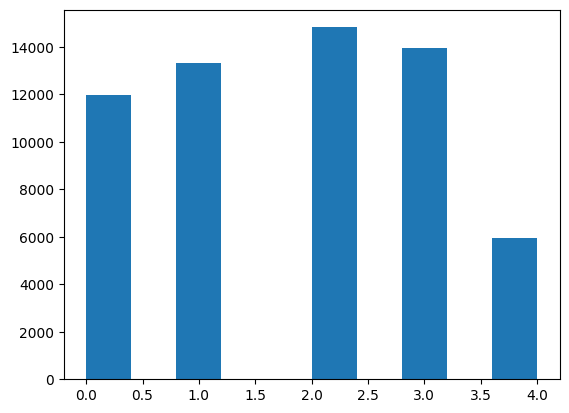

In [205]:
plt.hist(train_multi_labels.sum(axis = 1))

## Step 5. 모델링

### 문제 22. train_expand_images, train_labels로 초벌 모델을 생성해보세요.

- train_expand_images, train_labels로 싱글 label을 처리하는 image classification 초벌 모델을 생성해보세요.

In [206]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, Flatten, GlobalAvgPool2D
from keras.models import Model

def single_fashon_mnist_model():
    inputs = Input((56, 56, 1))
    x = Conv2D(filters=16, kernel_size=2, padding='same', activation='relu')(inputs)
    x = MaxPool2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2)(x)
    
    x = Flatten()(x)

    x = Dense(units=10, activation='softmax')(x)
    
    return Model(inputs, x)

In [207]:

def single_fashon_mnist_model2():
    inputs = Input((56, 56, 1))
    x = Conv2D(filters=16, kernel_size=2, padding='same', activation='relu')(inputs)
    x = MaxPool2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPool2D(pool_size=2)(x)
    
    x = GlobalAvgPool2D()(x)

    x = Dense(units=10, activation='softmax')(x)
    
    return Model(inputs, x)

### 문제 23. 모델을 할당 받고 서머리를 출력해보세요.

- single_fashin_mnist_model() 모델을 할당 받고 서머리를 출력하는 코드를 작성하세요.

In [208]:
model = single_fashon_mnist_model()
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 56, 56, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 56, 56, 16)        80        
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 28, 28, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 28, 28, 16)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        2080      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                    

In [209]:
model2 = single_fashon_mnist_model2()
model2.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 56, 56, 1)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 56, 56, 16)        80        
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 28, 28, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 28, 28, 16)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        2080      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                    

### 문제 24. 만든 모델에 로스와 옵티마이저, 메트릭을 설정하세요.

- 만든 모델에 loss는 categorical_crossentropy, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.

In [210]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

### 문제 25. 만든 모델에 train_expand_images를 학습시켜 보세요.

- train_expand_images, train_labels을 학습시키고 15 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.

In [211]:
hist = model.fit(
    train_expand_images.reshape(-1, 56, 56, 1),
    keras.utils.to_categorical(train_labels, 10),
    validation_data=(
        test_expand_images.reshape(-1, 56, 56 ,1),
        keras.utils.to_categorical(test_labels, 10)
    ),
    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15


2023-10-03 19:55:57.394406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.9063 - accuracy: 0.6600

2023-10-03 19:56:29.611510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 37s 74ms/step - loss: 0.9063 - accuracy: 0.6600 - val_loss: 0.6242 - val_accuracy: 0.7694
Epoch 2/15
469/469 [==============================] - 31s 66ms/step - loss: 0.5724 - accuracy: 0.7879 - val_loss: 0.5297 - val_accuracy: 0.8080
Epoch 3/15
469/469 [==============================] - 31s 67ms/step - loss: 0.5069 - accuracy: 0.8133 - val_loss: 0.4921 - val_accuracy: 0.8191
Epoch 4/15
469/469 [==============================] - 32s 69ms/step - loss: 0.4696 - accuracy: 0.8288 - val_loss: 0.4475 - val_accuracy: 0.8420
Epoch 5/15
469/469 [==============================] - 31s 67ms/step - loss: 0.4429 - accuracy: 0.8391 - val_loss: 0.4279 - val_accuracy: 0.8473
Epoch 6/15
469/469 [==============================] - 33s 69ms/step - loss: 0.4211 - accuracy: 0.8474 - val_loss: 0.4056 - val_accuracy: 0.8567
Epoch 7/15
469/469 [==============================] - 33s 69ms/step - loss: 0.4085 - accuracy: 0.8516 - val_loss: 0.3928 - val_accuracy: 0.8617
Epo

In [212]:
hist2 = model2.fit(
    train_expand_images.reshape(-1, 56, 56, 1),
    keras.utils.to_categorical(train_labels, 10),
    validation_data=(
        test_expand_images.reshape(-1, 56, 56 ,1),
        keras.utils.to_categorical(test_labels, 10)
    ),
    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15


2023-10-03 20:03:59.383305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.7642 - accuracy: 0.3604

2023-10-03 20:04:30.897389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 36s 72ms/step - loss: 1.7642 - accuracy: 0.3604 - val_loss: 1.3904 - val_accuracy: 0.4996
Epoch 2/15
469/469 [==============================] - 32s 68ms/step - loss: 1.2254 - accuracy: 0.5431 - val_loss: 1.1217 - val_accuracy: 0.5779
Epoch 3/15
469/469 [==============================] - 32s 68ms/step - loss: 1.0631 - accuracy: 0.6086 - val_loss: 1.0127 - val_accuracy: 0.6382
Epoch 4/15
469/469 [==============================] - 33s 70ms/step - loss: 0.9604 - accuracy: 0.6503 - val_loss: 0.9196 - val_accuracy: 0.6544
Epoch 5/15
469/469 [==============================] - 33s 69ms/step - loss: 0.8941 - accuracy: 0.6753 - val_loss: 0.8651 - val_accuracy: 0.6831
Epoch 6/15
469/469 [==============================] - 33s 69ms/step - loss: 0.8443 - accuracy: 0.6913 - val_loss: 0.8155 - val_accuracy: 0.6982
Epoch 7/15
469/469 [==============================] - 33s 70ms/step - loss: 0.8114 - accuracy: 0.7038 - val_loss: 0.7845 - val_accuracy: 0.7050
Epo

### 문제 26. 학습 진행 사항을 출력하세요.

- hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.

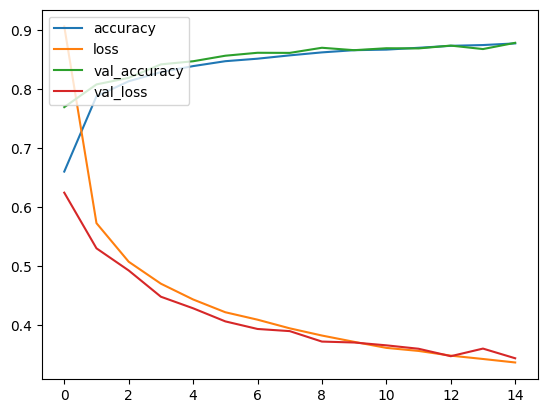

In [213]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

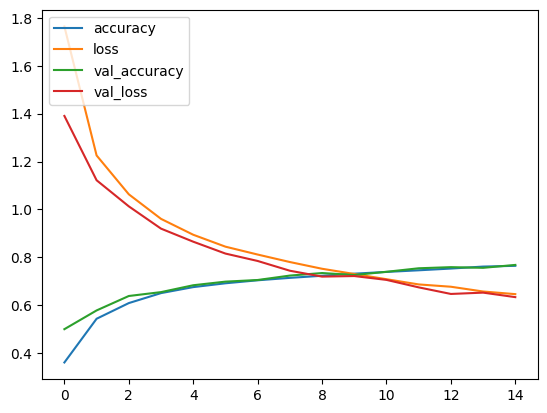

In [214]:
plt.plot(hist2.history['accuracy'], label='accuracy')
plt.plot(hist2.history['loss'], label='loss')
plt.plot(hist2.history['val_accuracy'], label='val_accuracy')
plt.plot(hist2.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

## Step 6. 결과 확인

### 문제 27. 완성된 모델에서 test_expand_images를 1장 넣고 결과를 res 변수에 저정하세요.

- 모델에  test_expand_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.

In [215]:
res = model.predict(test_expand_images[1].reshape(1, 56, 56, 1))
print(res.argmax())
print(test_labels[1])

2023-10-03 20:12:13.696989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 327ms/step
2
2


### 문제 28. res의 결과와 실제 label을 비교하고 test_exnpand_images[0]을 plt로 출력하세요.

- res의 결과와 실제 label을 비교하고 test_exnpand_images[0]을 plt로 출력하세요.

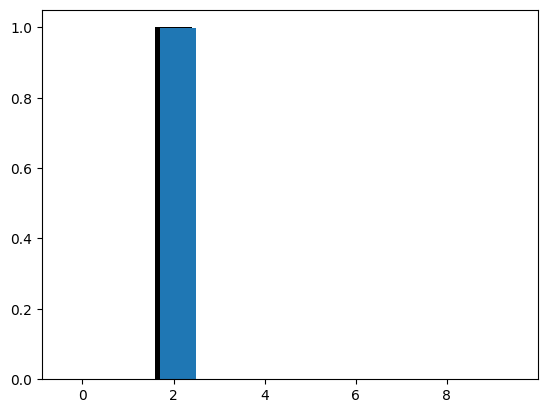

'Pullover'

In [216]:
plt.bar(range(10), tf.keras.utils.to_categorical(test_labels[1], 10), color='black')
plt.bar(np.array(range(10))+0.1, res[0])
plt.show()

idx2label(test_labels[1])


## Step 7. 멀티 레이블 모델링

### 문제 29. train_multi_images 와 train_multi_labels를 처리 할 수 있는 모델을 작성하세요.

- 기존 모델의 마지막 layer에 변환을 줘서 multi labels을 처리할 수 있는 모델을 작성하세요.

In [217]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 56, 56, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 56, 56, 16)        80        
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 28, 28, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 28, 28, 16)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        2080      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                    

In [218]:
def multi_fashion_mnist_model(model:Model)->Model:
    model.trainable=False # False로 하면 필터부분 학습 안함
    x = model.layers[-2].output #  flatten_6 (Flatten)         (None, 3136)              0    이 부분을 인터셉트
    x = Dense(10, activation='sigmoid')(x) # 각각의 슬롯의 확률을 구하기 위해 sigmoid 사용 (softmax는 하나만 부각)
    return Model(model.input, x)


### 문제 30. 기존 모델을 멀티 모델로 변환하여 모델 서머리를 출력하세요.

-  기존 모델을 멀티 모델로 변환하여 모델 서머리를 출력하세요.

In [219]:
new_model = multi_fashion_mnist_model(model)
new_model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 56, 56, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 56, 56, 16)        80        
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 28, 28, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 28, 28, 16)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        2080      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                    

### 문제 31. 문제 25과 같은 세팅으로 train_multi_images를 학습시키세요.

- 문제 25과 같은 세팅으로 train_multi_images를 학습시키세요.

In [220]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                  
new_hist = new_model.fit(
    train_multi_images,
    train_multi_labels,

    validation_data=(
        test_multi_images,
        test_multi_labels
    ),

    epochs=15,
    batch_size=128,
    verbose=1
)

Epoch 1/15


2023-10-03 20:12:15.504601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.3741

2023-10-03 20:12:25.373093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 13s 21ms/step - loss: 0.2559 - accuracy: 0.3741 - val_loss: 0.1980 - val_accuracy: 0.3875
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.1781 - accuracy: 0.3969 - val_loss: 0.1759 - val_accuracy: 0.3919
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1655 - accuracy: 0.3999 - val_loss: 0.1686 - val_accuracy: 0.3921
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1597 - accuracy: 0.4008 - val_loss: 0.1612 - val_accuracy: 0.3933
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1558 - accuracy: 0.4013 - val_loss: 0.1579 - val_accuracy: 0.3952
Epoch 6/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1532 - accuracy: 0.4013 - val_loss: 0.1559 - val_accuracy: 0.3903
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1517 - accuracy: 0.4034 - val_loss: 0.1575 - val_accuracy: 0.3955
Epoch 8/1

### 문제 32. 완성된 모델에서 test_multi_images를 1장 넣고 결과를 res 변수에 저정한뒤 실제 test_multi_labels와 비교해보세요.

- 완성된 모델에서 test_multi_images를 1장 넣고 결과를 res 변수에 저정한뒤 실제 test_multi_labels와 비교해보세요.

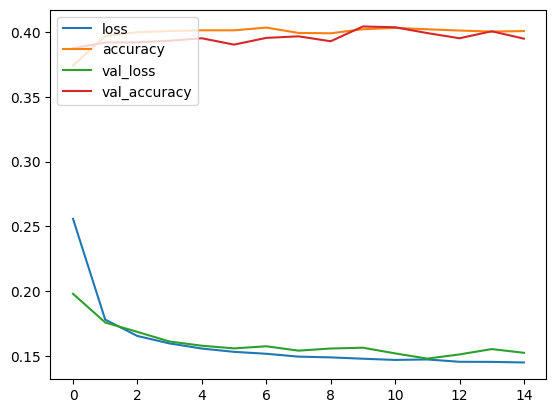

In [221]:
plt.plot(new_hist.history['loss'], label='loss')
plt.plot(new_hist.history['accuracy'], label='accuracy')
plt.plot(new_hist.history['val_loss'], label='val_loss')
plt.plot(new_hist.history['val_accuracy'], label='val_accuracy')
plt.legend(loc = 'upper left')
plt.show()


In [222]:
res = new_model.predict(test_multi_images[0].reshape(1, 56, 56, 1))
res.shape

2023-10-03 20:13:47.501036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 327ms/step


(1, 10)

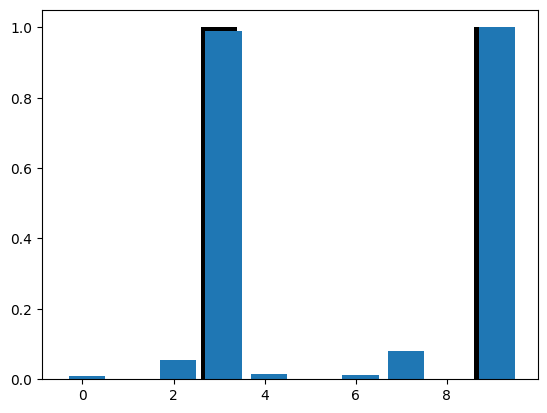

In [223]:
plt.bar(range(10), test_multi_labels[0], color='black')
plt.bar(np.array(range(10))+0.1, res[0])
plt.show()



In [227]:
epochs = 15
batch_size = 32

new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

for epoch in range(epochs):
    for _ in range(0, len(train_images), batch_size):
        batch_x = []
        batch_y = []

        for _ in range(batch_size):
            x, y = expanded_4times2(train_images, train_labels)
            batch_x.append(x)
            batch_y.append(y)

        batch_x = np.array(batch_x).reshape(-1, 56, 56, 1)
        batch_y = np.array(batch_y).reshape(-1, 10)
        new_model.train_on_batch(batch_x, batch_y)
    print(epoch, 'epoch')



2023-10-03 20:14:13.032067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0 e
1 e
2 e
3 e
4 e
5 e
6 e
7 e
8 e
9 e
10 e
11 e
12 e
13 e
14 e


In [229]:
res = new_model.predict(test_multi_images[4].reshape(1, 56, 56, 1))
res.shape

2023-10-03 20:22:05.509018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 332ms/step


(1, 10)

<BarContainer object of 10 artists>

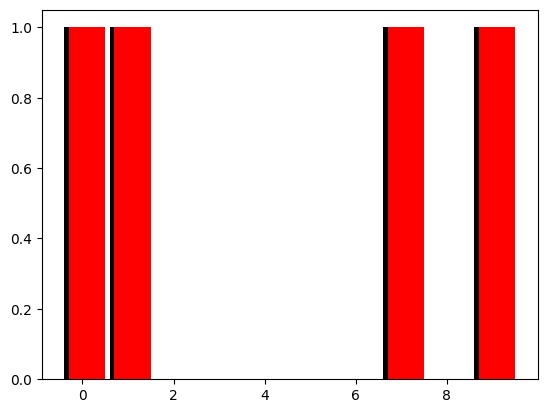

In [230]:
plt.bar(range(10), test_multi_labels[4], color='black')
plt.bar(np.array(range(10)) + 0.1, res[0]>0.5, color='red')

## Step 8. 모델 저장 및 로드, 다운

### 문제 33. 모델을 저장하세요.

- 모델을 저장하는 코드를 작성하세요.

In [231]:
model.save('part3_muticlass.h5')
new_model.save('part3_mutillabel.h5')


### 문제 34. 모델 파일을 새로운 모델에 로드하세요.

- 모델을 로드하는 코드를 작성하세요.

In [232]:
model3 = tf.keras.models.load_model('part3_muticlass.h5')
model4 = tf.keras.models.load_model('part3_mutillabel.h5')

### 문제 35. 로드한 모델을 test 데이터로 평가해보세요.

- 로드한 모델을 test 데이터로 평가해보세요.


In [233]:
loss, acc = model3.evaluate(test_expand_images.reshape(-1, 56, 56, 1), tf.keras.utils.to_categorical(test_labels))

print(loss, acc)

2023-10-03 20:22:15.247916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 16s 49ms/step - loss: 0.3430 - accuracy: 0.8786
0.3430032730102539 0.878600001335144


### 문제 36. 모델을 내 컴퓨터에 저장해보세요

- 모델을 내 컴퓨터에 저장해보세요.